A Quick DL Training Using California Housing Data 

In [237]:
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [238]:
df=fetch_california_housing()



In [239]:
df['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [240]:
x_train,x_test,y_train,y_test=train_test_split(df['data'],df['target'],test_size=0.2,random_state=10)

In [241]:
sc = StandardScaler()
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.transform(x_test)

In [242]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(90,activation="relu"))
model.add(keras.layers.Dense(75,activation="relu"))
model.add(keras.layers.Dense(50,activation="relu"))
model.add(keras.layers.Dense(1))

In [243]:
earlystopping_callback = keras.callbacks.EarlyStopping(patience=5,
                             restore_best_weights=True)

In [244]:
model.compile(loss="mean_absolute_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

In [245]:
history = model.fit(x_train_s, y_train, epochs=25, validation_split=0.15,callbacks=[earlystopping_callback])

Epoch 1/25
439/439 [==============================] - 2s 3ms/step - loss: 0.5250 - mean_squared_error: 0.6461 - val_loss: 0.4408 - val_mean_squared_error: 0.4255
Epoch 2/25
439/439 [==============================] - 1s 2ms/step - loss: 0.4145 - mean_squared_error: 0.3648 - val_loss: 0.4106 - val_mean_squared_error: 0.3574
Epoch 3/25
439/439 [==============================] - 1s 2ms/step - loss: 0.3939 - mean_squared_error: 0.3433 - val_loss: 0.4040 - val_mean_squared_error: 0.3735
Epoch 4/25
439/439 [==============================] - 1s 2ms/step - loss: 0.3751 - mean_squared_error: 0.3152 - val_loss: 0.3861 - val_mean_squared_error: 0.3228
Epoch 5/25
439/439 [==============================] - 1s 2ms/step - loss: 0.3704 - mean_squared_error: 0.3073 - val_loss: 0.3733 - val_mean_squared_error: 0.3230
Epoch 6/25
439/439 [==============================] - 1s 2ms/step - loss: 0.3620 - mean_squared_error: 0.3023 - val_loss: 0.3792 - val_mean_squared_error: 0.3228
Epoch 7/25
439/439 [========

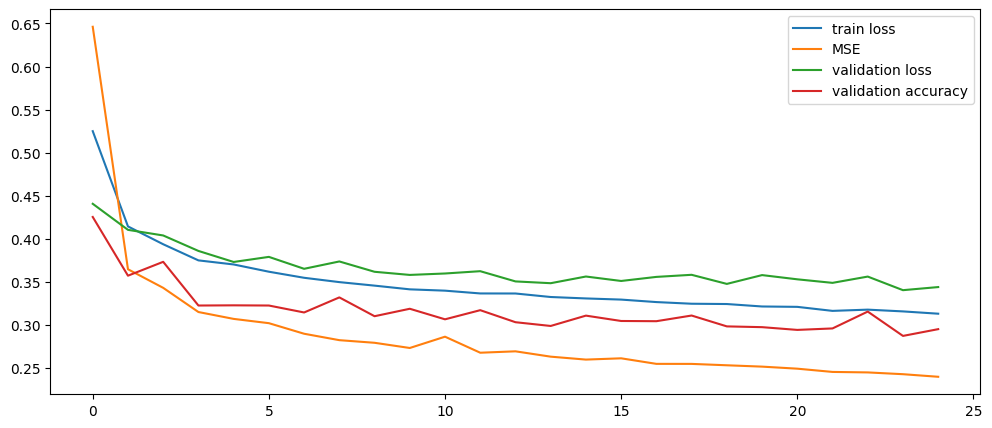

In [246]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["mean_squared_error"], label="MSE")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_mean_squared_error"], label="validation accuracy")
ax.legend()

In [247]:
model.evaluate(x_test_s, y_test, verbose=0)

[0.33480143547058105, 0.2833605408668518]